# 3. Multi-class Vnet on BV

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from vnet import *
from training import *
from niiutility import show_image, show_batch_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 3.1 Setup Torch Global Variable, load memory map 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, sampler, SubsetRandomSampler
from torchvision import transforms, utils

import torch.nn.functional as F  # useful stateless functions
import torchvision.transforms as T

#------------------------------- GLOBAL VARIABLES -------------------------------------#

USE_GPU = True
BATCH_SIZE = 1
NUM_WORKERS = 6
NUM_TRAIN = 80
LEARNING_RATE = 1e-2

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    print('using GPU for training')
else:
    device = torch.device('cpu')

using GPU for training


In [9]:
#-------------------------LOAD THE DATA SET-------------------------------------------#
regen = False

if regen:

    data_index = np.arange(107)
    data_index = np.delete(data_index, 46)
    data_idnex = np.random.shuffle(data_index)
else:
    data_index = np.array ([50,17,81,39,36,88,33,77,7,1,52,43,34,40,41,18,72,58,51,
                  63,78,35,16,79,0,89,70,67,60,13,76,8,2,47,4,97,29,85,32,
                  55,30,49,44,11,101,22,37,10,92,68,5,64,105,95,20,38,99,
                  84,86,91,96,71,98,104,45,69,103,27,19,59,73,106,93,24,80,
                  66,28,90,3,102,31,26,94,62,54,48,12,61,87,42,65,74,53,57,
                  14,56,83,100,25,6,75,82,23,9,21,15])


dataset_trans = niiDataset(data_index, 
                         transform=transforms.Compose([
                             downSample(2),
                             RandomFilp(0.5),
                             RandomAffine(15, 10)
                         ])
                     )

#-------------------------CREATE DATA LOADER FOR TRAIN AND VAL------------------------#

data_size = len(dataset_trans)
train_loader = DataLoader(dataset_trans, batch_size=BATCH_SIZE, \
                    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)),\
                    num_workers=NUM_WORKERS)
validation_loader = DataLoader(dataset_trans, batch_size=BATCH_SIZE,
                    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN,data_size)),\
                    num_workers=NUM_WORKERS)

* Print first 4 batch of data

In [ ]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(), \
          sample_batched['label'].size())
    # observe 4th batch and stop.
    if i_batch == 3:
        show_batch_image(sample_batched['image'],BATCH_SIZE,sample_batched['label'])
        break

In [ ]:
from vnet import VNet

#-------------------------NEW MODEL INIT WEIGHT--------------------------------------#

LoadCKP = True
CKPPath = 'checkpoint2019-03-31 13:33:50.772063.pth'

model = VNet(classnum=3, slim=False)
model.apply(weights_init)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=30, verbose=True)

if LoadCKP:
    model, optimizer, scheduler = loadckp(model, optimizer, scheduler, CKPPath, device=device)

In [ ]:
from loss import *

train(model, train_loader, validation_loader, optimizer, scheduler, \
      device=device, dtype=dtype,lossFun=dice_loss_2, epochs=500)

PATH = 'Vet_currculum_330.pth'
torch.save(model.state_dict(), PATH)


In [ ]:
#-------------------------SAVE THE MODEL STATE DICT----------------------------------#
PATH = 'Vet_currculum_330.pth'
torch.save(model.state_dict(), PATH)

## Checking the result

* load model dict from *.pth state dict
* show low res image slice
* save image to file

In [13]:
from training import check_img

ifCPK = True

PATH = 'checkpoint2019-04-02 19_31_19.246479.pth'

model = VNet(classnum=3, slim=False)

if ifCPK:
    model.load_state_dict(torch.load(PATH)['state_dict'])
    pass
else:
    model.load_state_dict(torch.load(PATH))
    
model = model.to(device=device)

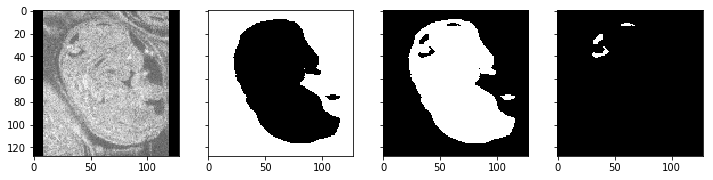

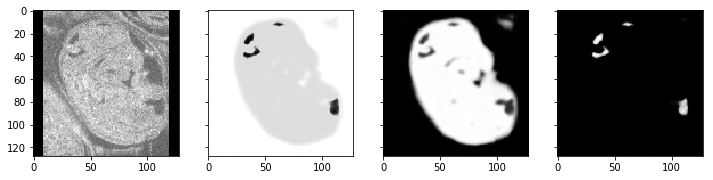

image 31 loss is 0.1296                 body dice coeff is 0.9292, bv dice coeff is 0.7596


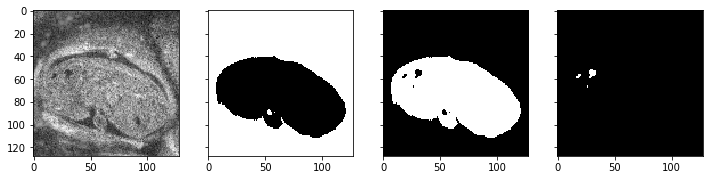

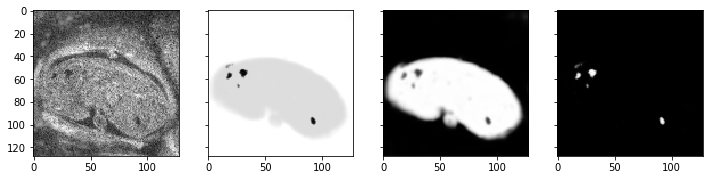

image 26 loss is 0.0889                 body dice coeff is 0.9259, bv dice coeff is 0.8711


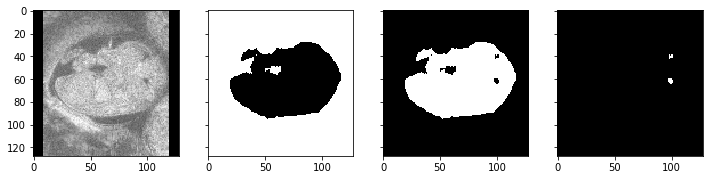

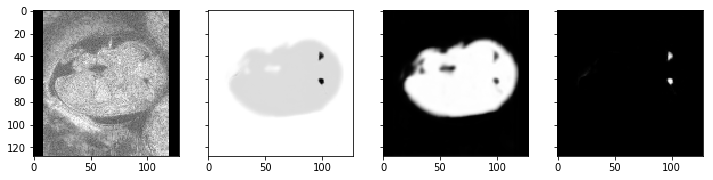

image 94 loss is 0.1186                 body dice coeff is 0.9267, bv dice coeff is 0.7962


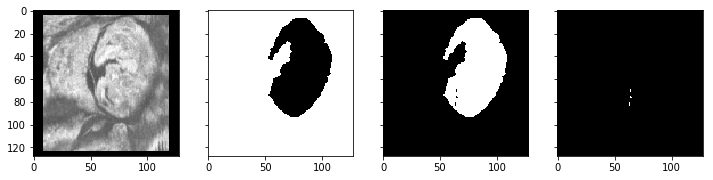

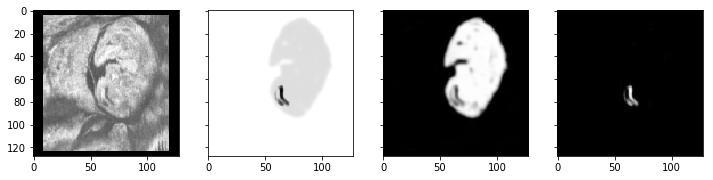

image 62 loss is 0.1924                 body dice coeff is 0.8626, bv dice coeff is 0.6573


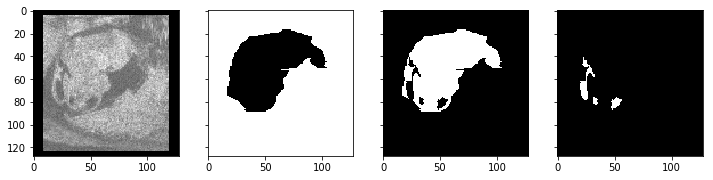

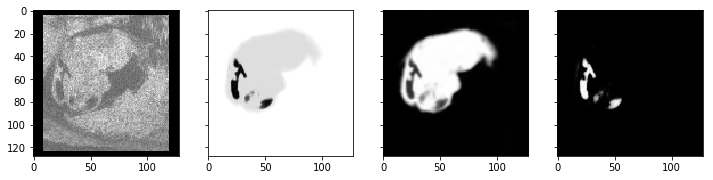

image 54 loss is 0.1016                 body dice coeff is 0.8977, bv dice coeff is 0.8497


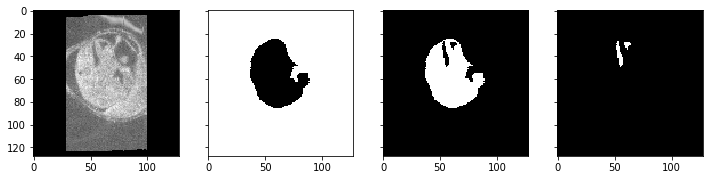

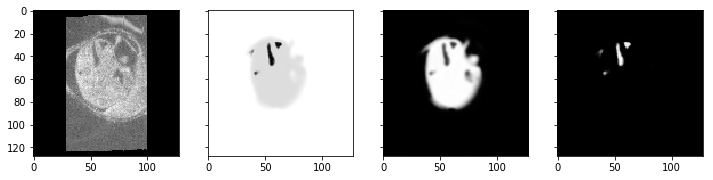

image 48 loss is 0.0926                 body dice coeff is 0.8991, bv dice coeff is 0.8905


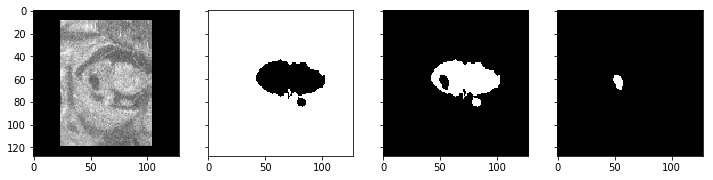

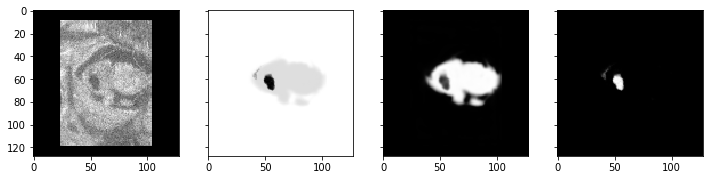

image 12 loss is 0.0839                 body dice coeff is 0.9113, bv dice coeff is 0.9149


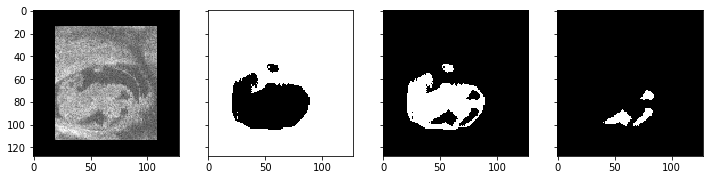

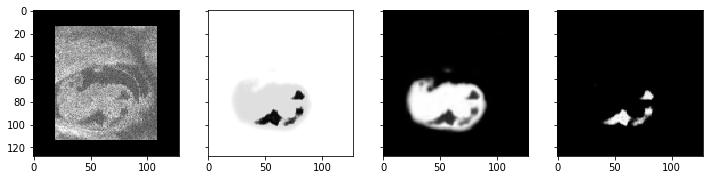

image 61 loss is 0.0825                 body dice coeff is 0.8892, bv dice coeff is 0.8971


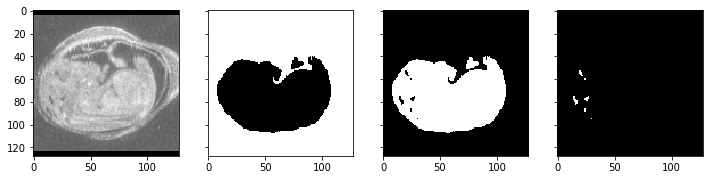

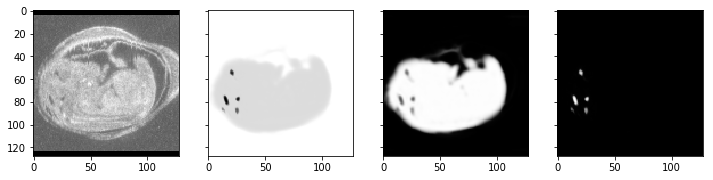

image 87 loss is 0.1009                 body dice coeff is 0.9305, bv dice coeff is 0.8144


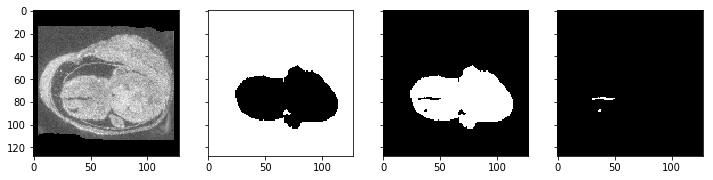

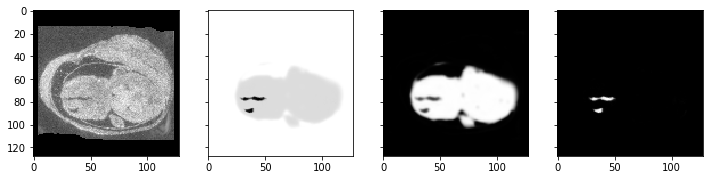

image 42 loss is 0.0968                 body dice coeff is 0.9304, bv dice coeff is 0.8132


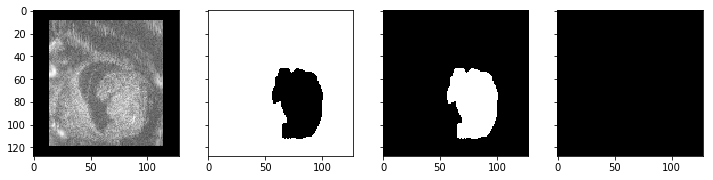

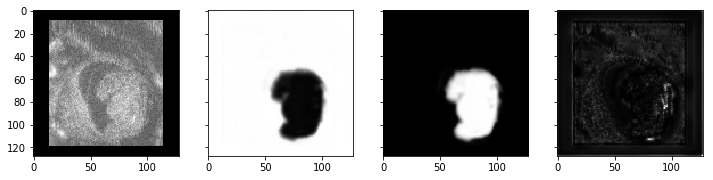

image 65 loss is 0.0869                 body dice coeff is 0.9197, bv dice coeff is 0.8633


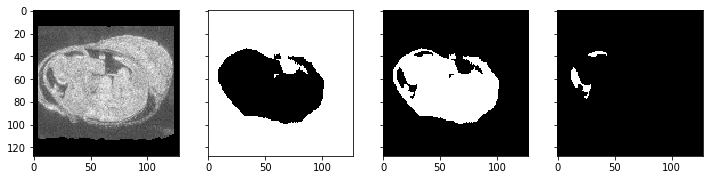

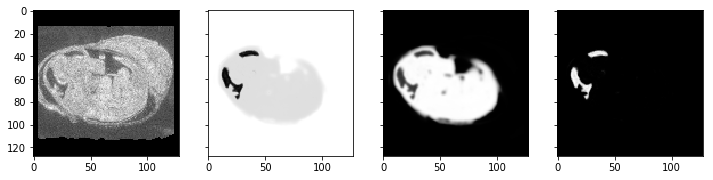

image 74 loss is 0.0803                 body dice coeff is 0.9288, bv dice coeff is 0.8703


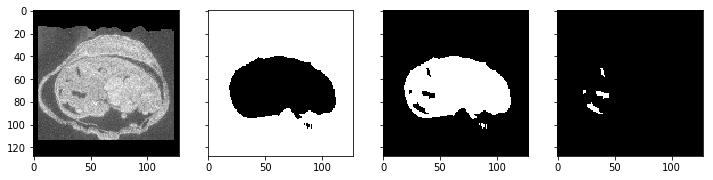

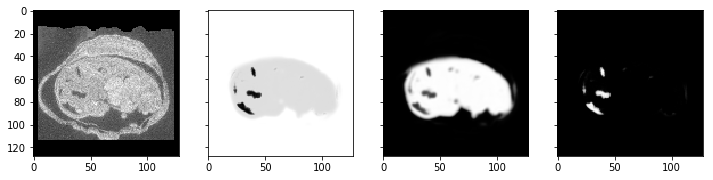

image 53 loss is 0.0891                 body dice coeff is 0.9350, bv dice coeff is 0.8490


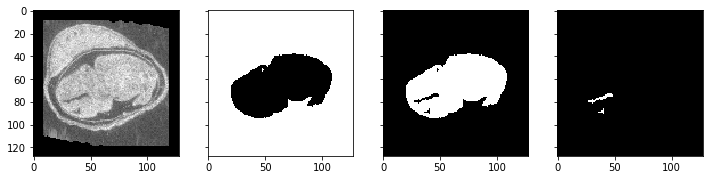

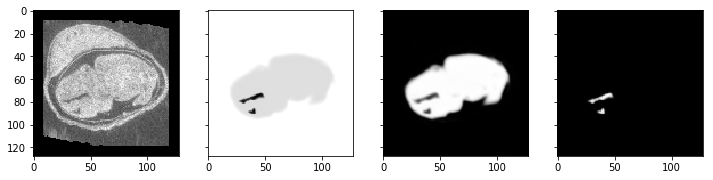

image 57 loss is 0.0748                 body dice coeff is 0.9334, bv dice coeff is 0.8816


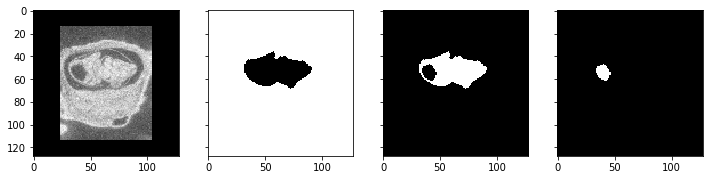

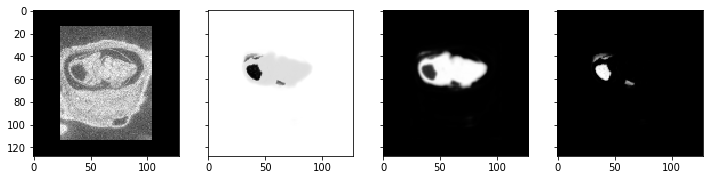

image 14 loss is 0.1243                 body dice coeff is 0.8344, bv dice coeff is 0.8598


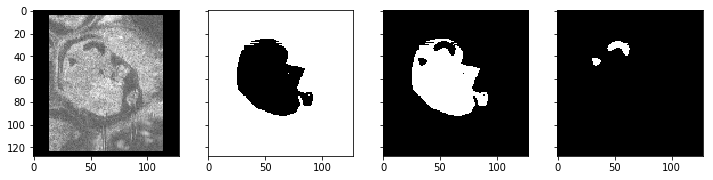

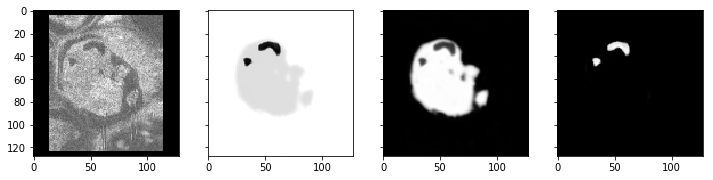

image 56 loss is 0.0713                 body dice coeff is 0.9131, bv dice coeff is 0.9055


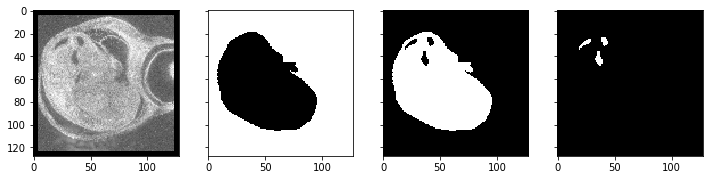

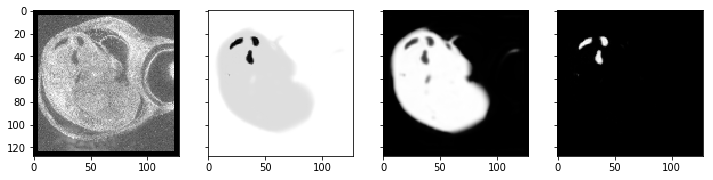

image 83 loss is 0.0991                 body dice coeff is 0.8929, bv dice coeff is 0.8584


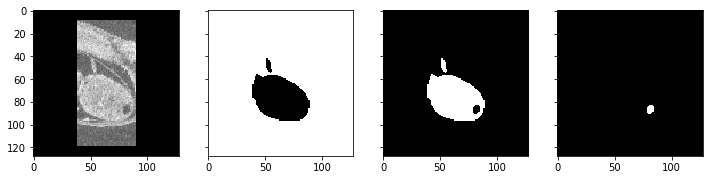

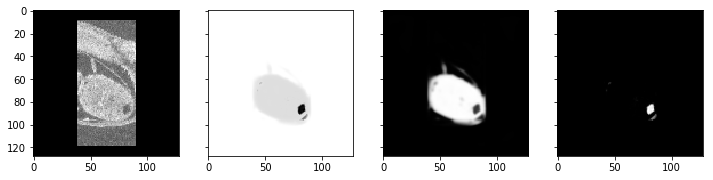

image 100 loss is 0.1731                 body dice coeff is 0.7884, bv dice coeff is 0.7909


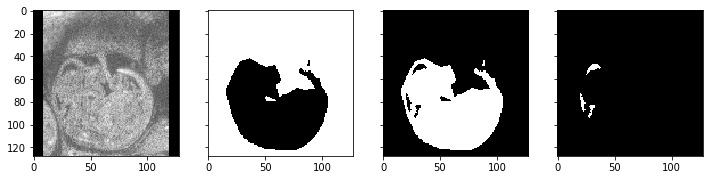

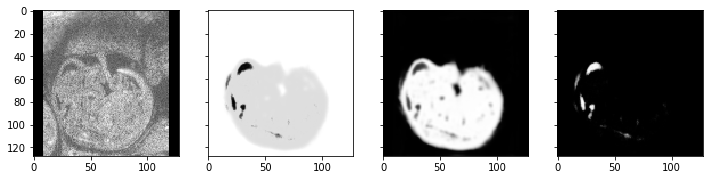

image 25 loss is 0.1848                 body dice coeff is 0.9143, bv dice coeff is 0.6457


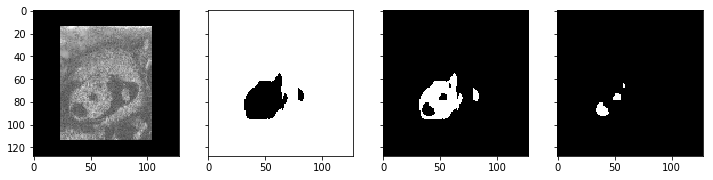

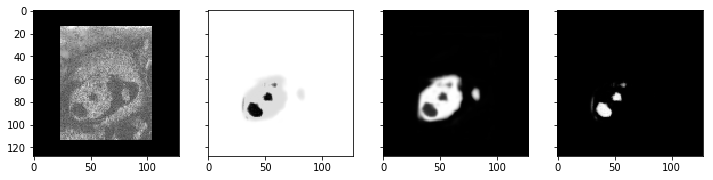

image 6 loss is 0.1333                 body dice coeff is 0.8780, bv dice coeff is 0.8226


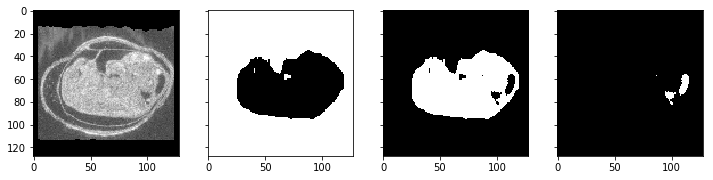

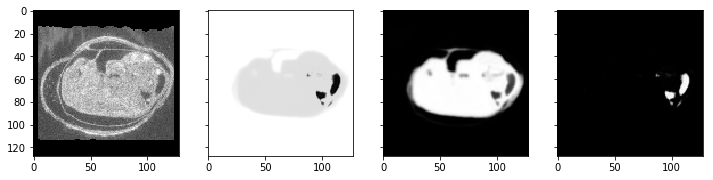

image 75 loss is 0.0704                 body dice coeff is 0.9236, bv dice coeff is 0.9039


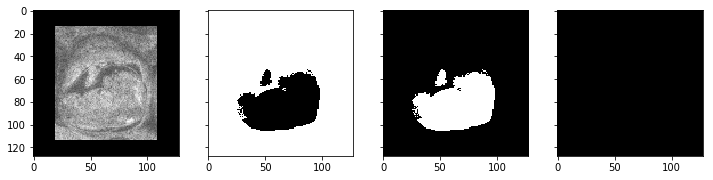

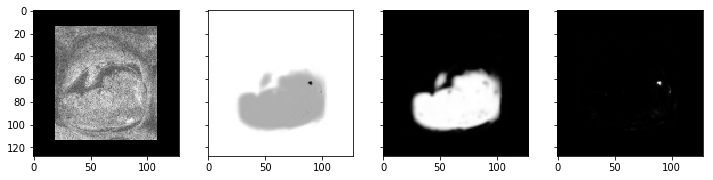

image 82 loss is 0.0650                 body dice coeff is 0.9126, bv dice coeff is 0.9313


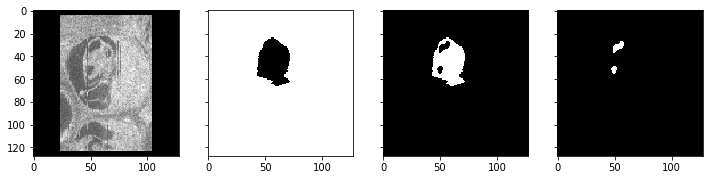

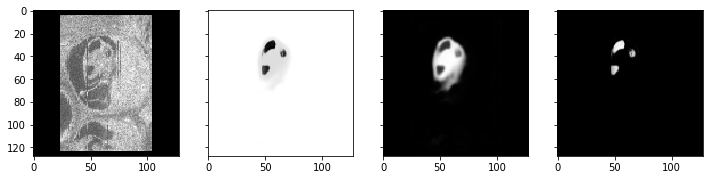

image 23 loss is 0.1175                 body dice coeff is 0.8227, bv dice coeff is 0.8372


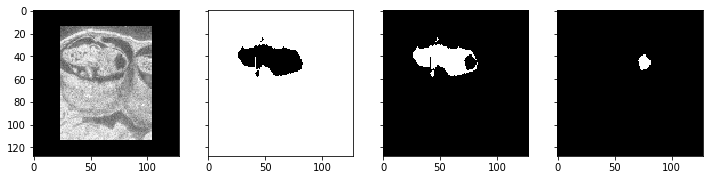

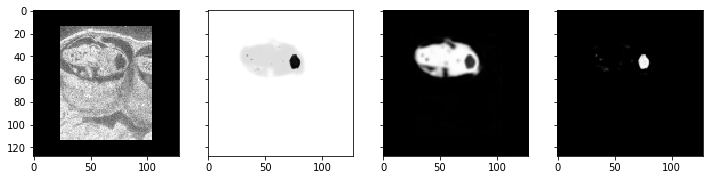

image 9 loss is 0.1329                 body dice coeff is 0.8183, bv dice coeff is 0.8565


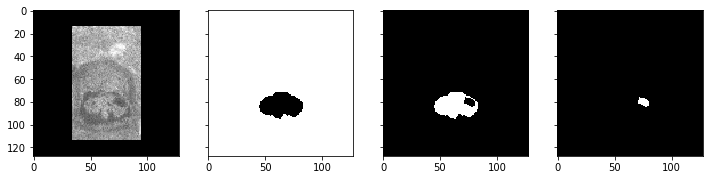

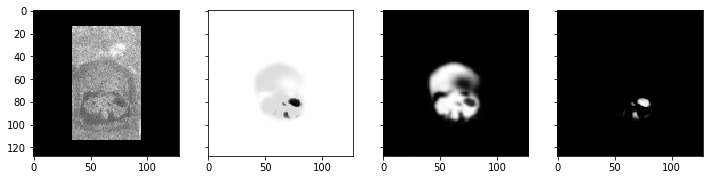

image 21 loss is 0.4928                 body dice coeff is 0.4063, bv dice coeff is 0.4867


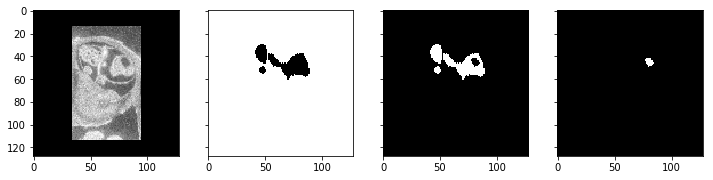

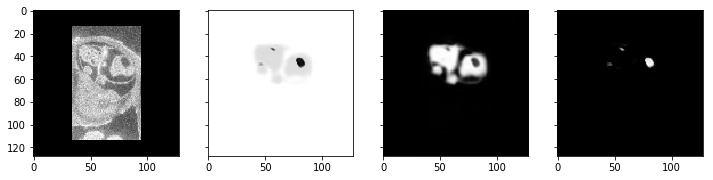

image 15 loss is 0.1964                 body dice coeff is 0.6993, bv dice coeff is 0.8479
average body dice is 0.8701, average bv dice is 0.8260


In [19]:
data_index = np.array ([50,17,81,39,36,88,33,77,7,1,52,43,34,40,41,18,72,58,51,
              63,78,35,16,79,0,89,70,67,60,13,76,8,2,47,4,97,29,85,32,
              55,30,49,44,11,101,22,37,10,92,68,5,64,105,95,20,38,99,
              84,86,91,96,71,98,104,45,69,103,27,19,59,73,106,93,24,80,
              66,28,90,3,102,31,26,94,62,54,48,12,61,87,42,65,74,53,57,
              14,56,83,100,25,6,75,82,23,9,21,15])

data_index = data_index[80:]

dataset_test = niiDataset(data_index, 
                         transform=transforms.Compose([
                             downSample(2),
                         ])
                     )

validation_loader = DataLoader(dataset_test, batch_size=1)

from loss import *

check_img(model, validation_loader, device, dtype, cirrculum=2, lossFun=dice_loss_2, data_index=data_index)